#Important libararies

In [85]:
import numpy as np  #manipulation des tableaux et calculs scientifiques
import pandas as pd # manipulation, nettoyage, analyse de bases de donnees

import seaborn as sns #visualisation de donnees avec python
import matplotlib as mpl #visualisation de donnees avec python
import matplotlib.pylab as plt

import scipy as sp        #faire de la statistique decisionnelle

import statsmodels as stm  #series temporelles (ARIMA, SMOOTHING)
#import neuralprophet (facebook), tensorflow (google)
import warnings
warnings.filterwarnings('ignore')

#Import data

In [86]:
data = pd.read_csv("/content/sample_data/energie.csv", sep=";")
fichier = "/content/sample_data/energie.csv"
data = pd.read_csv(fichier, sep=";")
data.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [87]:
data.tail()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
1398,2021-11,Données consolidées,Occitanie,2142,897.0,59,NaN,0,59,638,...,60,3581,-1608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1399,2021-11,Données consolidées,Normandie,5376,4929.0,239,-1.0,31,208,5,...,58,2528,2848.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1400,2021-11,Données consolidées,Hauts-de-France,4319,2265.0,1239,0.0,5,1233,1,...,80,4593,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401,2021-11,Données consolidées,PACA,1745,NaN,847,-1.0,20,828,712,...,61,3561,-1821.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1402,2021-11,Données consolidées,Pays-de-la-Loire,940,NaN,700,328.0,3,369,0,...,40,2607,-1667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
data.describe()

,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
count,1403.000000,913.000000,1403.000000,974.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1319.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,106.000000
mean,7159.502495,7974.184009,534.990734,166.092402,32.576622,395.555952,855.678546,341.652174,121.835353,115.658589,6005.313614,706.542077,6927.450820,2712.459016,957.565574,596.959016,1481.483607,1151.049180,163.660377
std,11956.378704,9812.767818,1064.199211,342.281739,83.620732,803.936035,1576.319817,639.257228,239.966713,186.335476,10569.469874,3149.781432,1408.657963,1087.979256,496.638019,692.622676,424.143380,588.681267,1267.124686
min,92.000000,26.000000,-3.000000,-10.000000,-4.000000,-1.000000,0.000000,1.000000,0.000000,7.000000,0.000000,-7949.000000,2118.000000,-1111.000000,-798.000000,-1005.000000,341.000000,-322.000000,-2912.000000
25%,554.500000,2732.000000,33.000000,0.000000,0.000000,18.000000,5.000000,65.000000,13.500000,36.000000,1809.500000,-1491.000000,6126.750000,2080.000000,759.500000,110.250000,1207.000000,693.750000,-574.000000
50%,3654.000000,4948.000000,172.000000,18.000000,5.000000,125.000000,67.000000,129.000000,34.000000,61.000000,2961.000000,0.000000,7072.000000,2517.000000,1043.500000,582.500000,1518.000000,1248.500000,183.000000
75%,7127.000000,7139.000000,534.000000,187.000000,20.000000,369.000000,842.500000,275.000000,112.000000,92.000000,4515.000000,3618.500000,7880.500000,3351.000000,1299.250000,1111.750000,1787.750000,1572.000000,933.250000
max,58310.000000,43792.000000,8721.000000,2833.000000,1309.000000,5910.000000,8607.000000,5902.000000,1713.000000,892.000000,57406.000000,7928.000000,9468.000000,6126.000000,1907.000000,2021.000000,2272.000000,2235.000000,2642.000000


In [89]:
data.sample(5)

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
219,2014-04,Données définitives,Pays-de-la-Loire,494,NaN,351,336.0,14,0,2,...,25,2099,-1604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,2013-04,Données définitives,Grand-Est,8815,6661.0,876,611.0,0,264,835,...,36,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1277,2021-02,Données consolidées,Bretagne,499,33.0,180,55.0,10,169,55,...,33,2273,-1780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2013-09,Données définitives,Bourgogne-Franche-Comté,209,NaN,51,31.0,0,19,113,...,11,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,2013-10,Données définitives,Bretagne,217,NaN,6,NaN,3,3,39,...,24,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Mois                                      1403 non-null   object 
 1   Qualité                                   1403 non-null   object 
 2   Territoire                                1403 non-null   object 
 3   Production totale                         1403 non-null   int64  
 4   Production nucléaire                      913 non-null    float64
 5   Production thermique totale               1403 non-null   int64  
 6   Production thermique charbon              974 non-null    float64
 7   Production thermique fioul                1403 non-null   int64  
 8   Production thermique gaz                  1403 non-null   int64  
 9   Production hydraulique                    1403 non-null   int64  
 10  Production éolien                   

#Data manipulation

On a 1403 observations au total. Il y a 22 colonnes, avec 2 variables qualitatives.

<Axes: ylabel='count'>

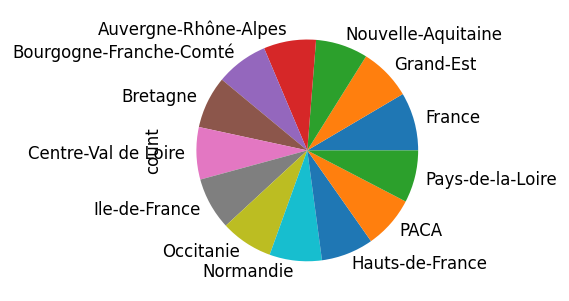

In [91]:
data.Territoire.value_counts().plot(kind="pie")

In [92]:
data['Consommation totale'].dtype

dtype('int64')

In [93]:
#data['Mois'] = pd.to_datetime(data['Mois'])
#data

<Axes: xlabel='Territoire'>

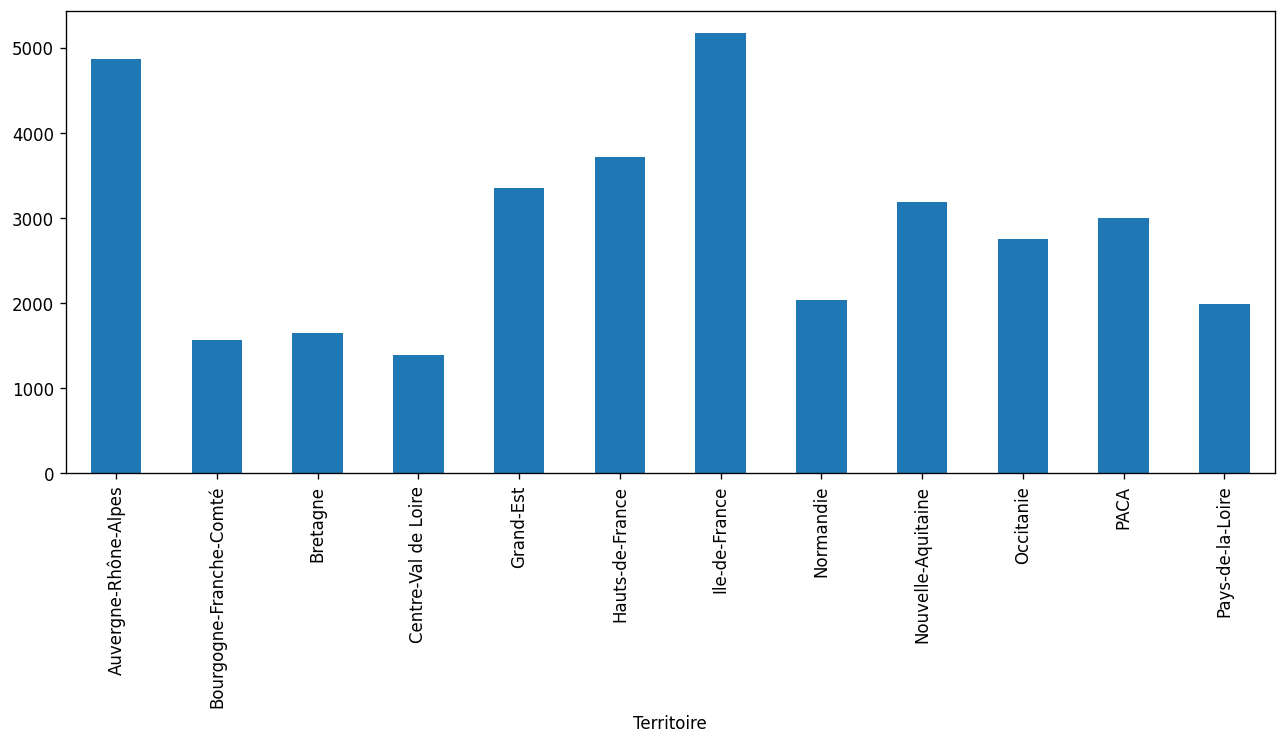

In [94]:
data.query('Territoire!="France"').groupby("Territoire")['Consommation totale'].mean().plot(kind="bar",figsize=(13,5))

#Analyse univariee (Consommation totale)

In [95]:
data=data.query("Territoire=='France'")
data

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,2021-07,Données consolidées,France,40555,28449.0,1605,54.0,159,1392,5626,...,892,32959,7268.0,9252.0,2080.0,1907.0,1316.0,2090.0,1353.0,NaN
1357,2021-08,Données consolidées,France,39162,29010.0,957,70.0,166,720,4408,...,857,31184,7600.0,9266.0,1698.0,1878.0,1837.0,2090.0,1393.0,NaN
1370,2021-09,Données consolidées,France,38505,29001.0,2197,498.0,146,1552,3417,...,815,32350,5764.0,2118.0,6126.0,1114.0,1433.0,2126.0,1468.0,NaN
1383,2021-10,Données consolidées,France,41695,30658.0,3621,600.0,180,2840,3092,...,812,36762,4291.0,2745.0,4155.0,464.0,861.0,2141.0,1873.0,NaN


<Axes: >

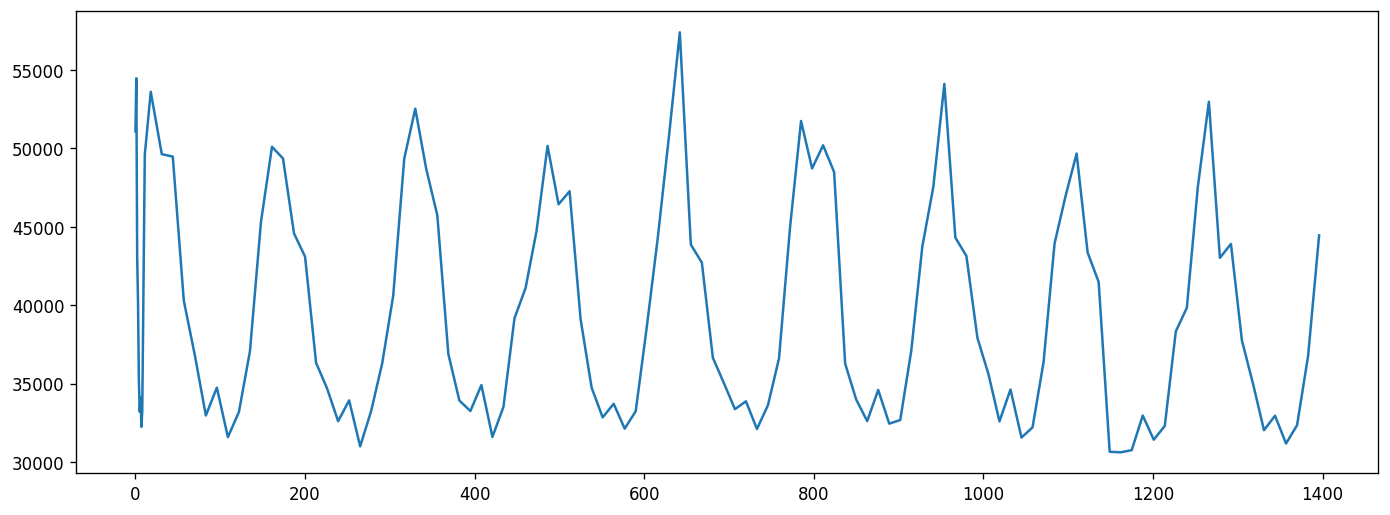

In [96]:
data['Consommation totale'].plot(figsize=(14, 5))

In [97]:
data.Mois

0       2012-01
1       2012-02
2       2012-03
3       2012-04
4       2012-05
         ...   
1344    2021-07
1357    2021-08
1370    2021-09
1383    2021-10
1396    2021-11
Name: Mois, Length: 119, dtype: object

In [98]:
data.index=data.Mois
data

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
Mois,,,,,,,,,,,,,,,,,,,,,
2012-01,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
2012-02,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2012-03,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
2012-04,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
2012-05,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07,2021-07,Données consolidées,France,40555,28449.0,1605,54.0,159,1392,5626,...,892,32959,7268.0,9252.0,2080.0,1907.0,1316.0,2090.0,1353.0,NaN
2021-08,2021-08,Données consolidées,France,39162,29010.0,957,70.0,166,720,4408,...,857,31184,7600.0,9266.0,1698.0,1878.0,1837.0,2090.0,1393.0,NaN
2021-09,2021-09,Données consolidées,France,38505,29001.0,2197,498.0,146,1552,3417,...,815,32350,5764.0,2118.0,6126.0,1114.0,1433.0,2126.0,1468.0,NaN


<Axes: xlabel='Mois'>

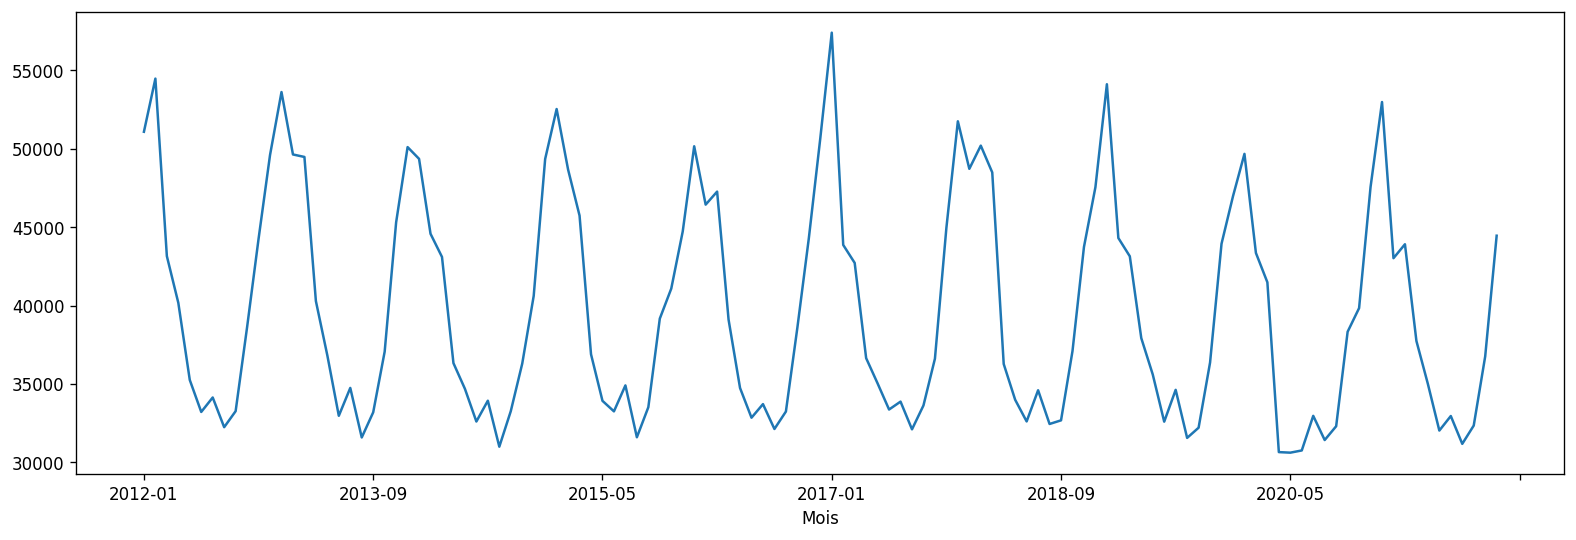

In [99]:
data["Consommation totale"].plot(figsize=(16,5))

In [100]:
data["Consommation totale"].describe()

count      119.000000
mean     39613.798319
std       7050.614648
min      30622.000000
25%      33267.500000
50%      37063.000000
75%      44653.500000
max      57406.000000
Name: Consommation totale, dtype: float64

In [101]:
#data.corr()

#Données manquantes et dupliquées

In [102]:
data['Consommation totale'].isna().sum()

0

In [103]:
#aucune données manquantes

In [104]:
data['Consommation totale'].duplicated().sum()

0

In [105]:
#aucune données dupliquées

#Dispersion

In [106]:
dispersion_moyenne=data["Consommation totale"].std()/data["Consommation totale"].mean()*100
dispersion_moyenne

17.798380732659766

Le coefficient de variation (CV) est le rapport de l'écart-type à la moyenne. Plus la valeur du coefficient de variation est élevée, plus la dispersion autour de la moyenne est grande. Il est généralement exprimé en pourcentage.

In [107]:
Q1=data["Consommation totale"].quantile(0.25)
Q3=data["Consommation totale"].quantile(0.75)
IQR=Q3-Q1
print(Q1, Q3, IQR)

33267.5 44653.5 11386.0


In [108]:
dispersion_mediane=IQR/data["Consommation totale"].median()*100
dispersion_mediane

30.72066481396541

#Données aberrantes

<Axes: >

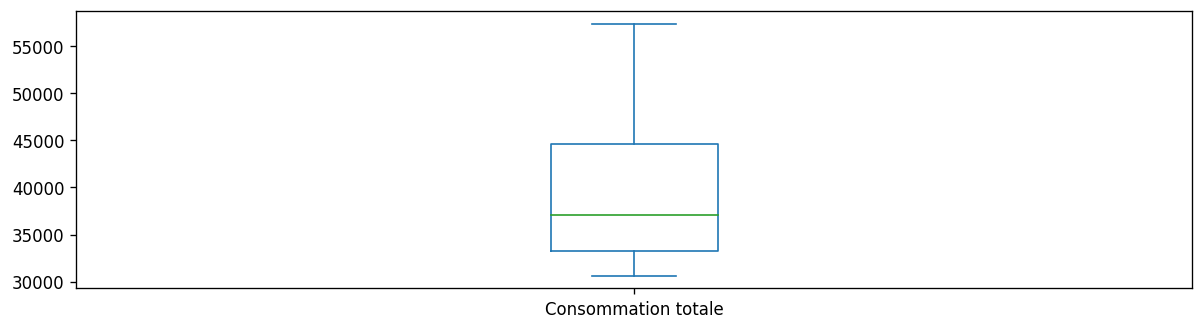

In [109]:
data["Consommation totale"].plot(kind="box")

In [110]:
outliers_min=float(Q1-1.5*IQR)
outliers_max= float(Q3+1.5*IQR)
outliers_min,outliers_max

(16188.5, 61732.5)

In [111]:
#pad des valeurs aberrantes

#Test de normalité

<Axes: ylabel='Density'>

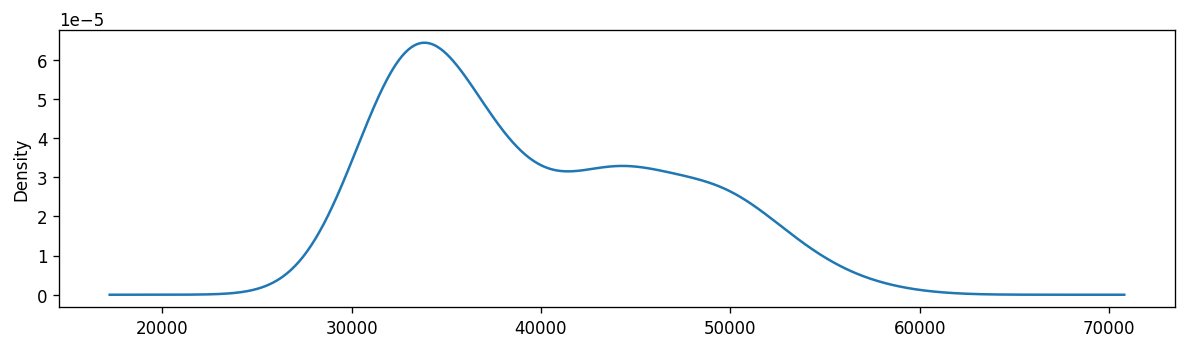

In [112]:
data["Consommation totale"].plot(kind="density")

In [113]:
#VISUALISATION: il semblerait que cette variable ne suit pas la loi normale

In [114]:
#Test de Normalité
#h0: la variable suit la loi normale (on rejette H0 si pvalue < 5%)
import scipy.stats
scipy.stats.shapiro(data["Consommation totale"])

#si pvalue<5% alors notre variable n'est pas issue de hasard

ShapiroResult(statistic=0.908329427242279, pvalue=5.878083015886659e-07)

In [115]:
#la consommation energetique ne suit pas la loi normale

#Stationnarité

Une série temporelle est stationnaire lorsque les observations ne dépendent pas du temps. Les propriétés statistiques de ces séries temporelles ne changeront pas avec le temps, elles auront donc une moyenne, une variance et une covariance constantes.

Les séries temporelles qui présentent des tendances ou des saisons ne sont pas stationnaires. En effet, les tendances induisent un changement dans le mouvement des données par rapport au temps, ce qui entraînera une variation de la moyenne au fil du temps. Quant à la saisonnalité, elle se produit lorsque le motif dans la série temporelle montre une variation à intervalles réguliers, ce qui entraînera une variation de la variance au fil du temps.

Lorsqu'une série temporelle est non stationnaire, la moyenne, la variance et la covariance continuent de changer, il ne sera donc pas possible d'obtenir des inférences précises à partir d'elles même si une estimation est faite après les avoir moyennées.

La stationnarité d'une série temporelle peut être détectée par :

1. Traçage visuel de la série temporelle et vérification de la tendance ou de la saisonnalité.
2. Division de la série temporelle en différentes partitions et comparaison des inférences statistiques.
3. Possibilité d'effectuer le test de Dickey-Fuller augmenté (ADF) pour vérifier la stationnarité.
   Le test de Dickey-Fuller augmenté (ADF) est un test statistique qui appartient au test de racine unitaire et qui teste l'hypothèse nulle.

Les deux méthodes les plus courantes pour transformer une série en stationnarité sont les suivantes :

1. **Transformation** : Utilisation du logarithme ou de la racine carrée pour stabiliser la variance non constante.
   
2. **Différenciation** : Soustrait la valeur actuelle de la précédente. La différenciation peut être effectuée dans différents ordres, comme la différenciation du premier ordre (qui aura une tendance linéaire), la différenciation du deuxième ordre (qui aura des tendances quadratiques), etc.

In [116]:
#h0: La série n'est pas stationnaire (série temporelle)

#CONCLUSION: si pvalue>5% alors la série est temporelle ou non stationnaire

<Axes: xlabel='Mois'>

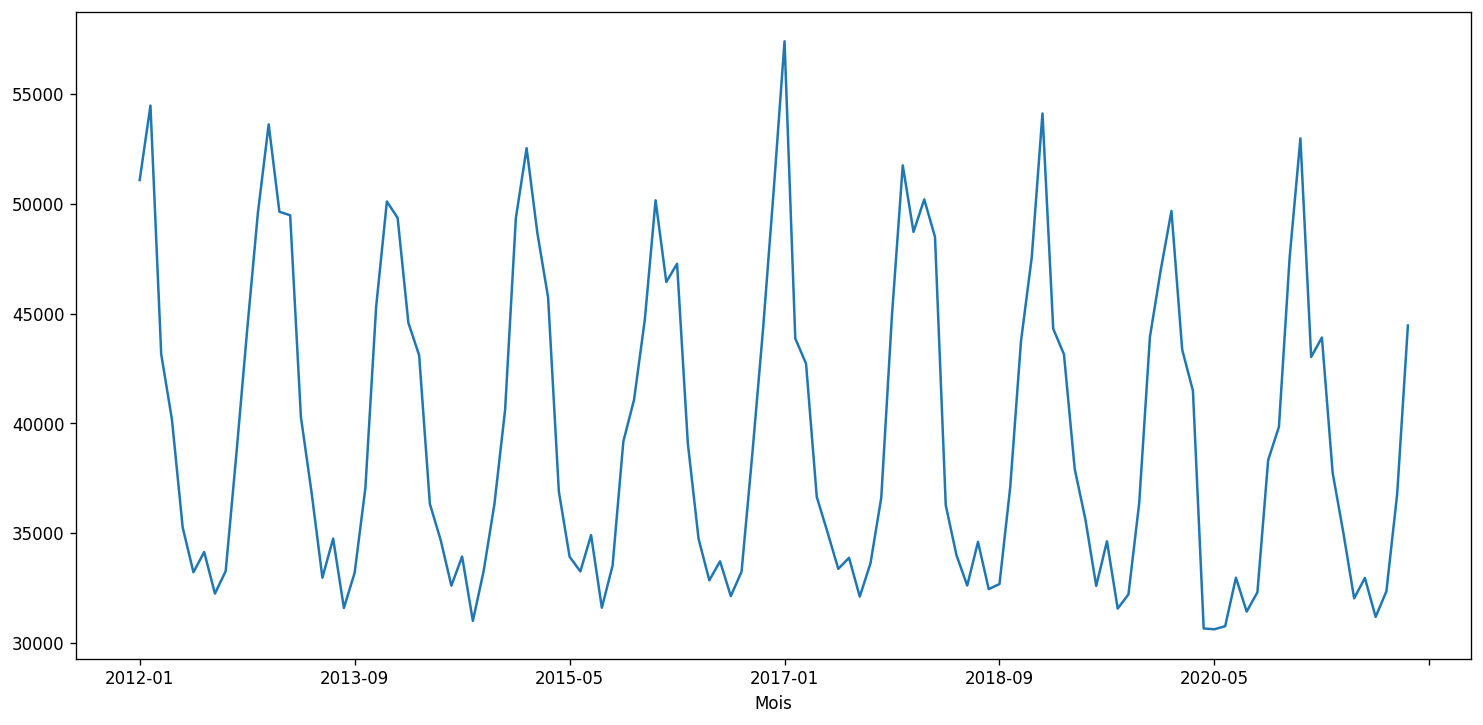

In [117]:
data["Consommation totale"].plot(figsize=(15,7))

In [118]:
#visuellement : cette serie est temporelle car on remarque une variation au cours du temps

In [119]:
from statsmodels.tsa.stattools import adfuller
print('ADF statistic :', adfuller(data["Consommation totale"])[0])
print('p-value :', adfuller(data["Consommation totale"])[1])
print('critical values:')
for key, value in adfuller(data["Consommation totale"])[4].items() :
  print('\t%s: %.3f' % (key, value))

ADF statistic : -1.7475408485626462
p-value : 0.4067992848764901
critical values:
	1%: -3.493
	5%: -2.889
	10%: -2.581


In [120]:
#pvalue>5% donc la serie est temporelle.

Nous disposons de 119 informations sur la consommation avec aucune donnee manquante ni dupliquée, cette derniere varie de 30622 à 57406 avec une moyenne de 39613. 50% de la conso est inferieure à 37063 et 75% superieure à 33267. Cependant cette consommation energetique reste homogene. On ne dispose pas de consommation atypique. on a aussi vu que cette conso pourrait etre expliquée par d'autres facteurs exogenes. On a aussi montrer qu'elle depend du temps et donc Il faudra considerer sa temporalité!

questions: quelles sont les facteurs exogenes qui influent sur la consommation Quels modeles utilisés pour predire la consommation pour les 12 prochains mois

#Décomposition de la serie

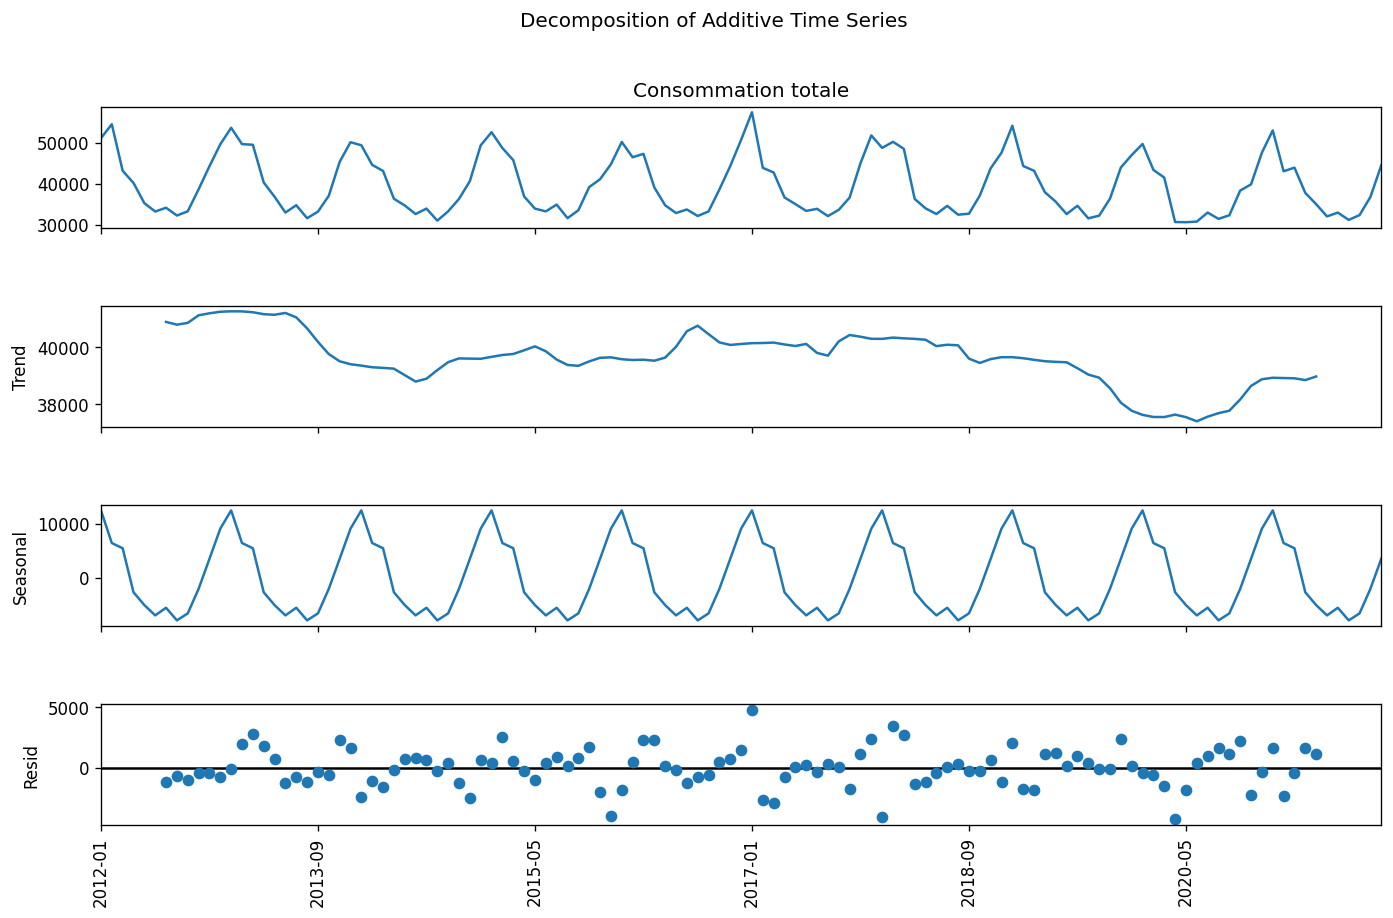

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose

y=data['Consommation totale']
# Seasonal decomposition
decomposition = seasonal_decompose(y, model='additive', period=12)
fig = decomposition.plot()

fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of Additive Time Series')

# par pas de 12
for ax in fig.axes:
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.show()

#Autocorrelation and partial autocorrelation

L'autocorrélation est simplement la corrélation d'une série avec ses propres lags. Si une série est significativement autocorrélée, cela signifie que les valeurs précédentes de la série (lags) peuvent être utiles pour prédire la valeur actuelle.

La corrélation partielle transmet également des informations similaires, mais elle exprime la corrélation pure d'une série et de son retard (lag), en excluant les contributions de corrélation des lags intermédiaires.

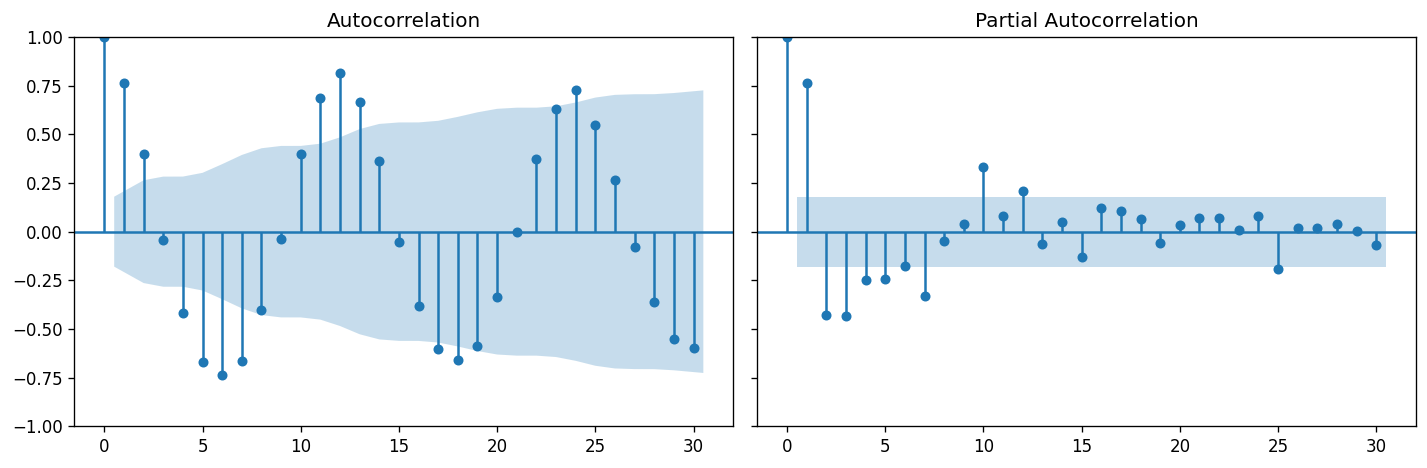

In [122]:
import statsmodels.tsa.api as smt

y=data['Consommation totale']
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(y, lags=30, ax=axes[0])
smt.graphics.plot_pacf(y, lags=30, ax=axes[1])
plt.tight_layout()

#Analyse bivariee

In [123]:
#data.info()
#data['Mois'] = pd.to_datetime(data['Mois'])
#data

In [124]:
unique_values = data['Consommation totale'].unique()
print(unique_values)

[51086 54476 43156 40176 35257 33219 34141 32247 33269 38628 44260 49602
 53619 49639 49480 40292 36821 32973 34751 31591 33195 37063 45310 50108
 49359 44580 43104 36331 34695 32608 33935 31004 33266 36301 40617 49350
 52536 48676 45739 36898 33927 33256 34912 31603 33521 39170 41085 44727
 50161 46440 47270 39102 34746 32852 33718 32132 33245 38590 44293 50670
 57406 43869 42723 36650 35037 33374 33877 32110 33633 36615 44960 51754
 48723 50202 48493 36276 33994 32614 34602 32451 32683 37102 43738 47553
 54117 44311 43145 37927 35611 32598 34629 31564 32213 36367 43945 46974
 49676 43358 41486 30658 30622 30763 32970 31428 32307 38332 39840 47565
 52983 43024 43913 37747 35007 32032 32959 31184 32350 36762 44458]


In [168]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data1 = data.select_dtypes(include=numerics)
data1

,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
Mois,,,,,,,,,,,,,,,,,,,
2012-01,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
2012-02,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2012-03,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
2012-04,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
2012-05,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07,40555,28449.0,1605,54.0,159,1392,5626,2295,1686,892,32959,7268.0,9252.0,2080.0,1907.0,1316.0,2090.0,1353.0,NaN
2021-08,39162,29010.0,957,70.0,166,720,4408,2213,1713,857,31184,7600.0,9266.0,1698.0,1878.0,1837.0,2090.0,1393.0,NaN
2021-09,38505,29001.0,2197,498.0,146,1552,3417,1651,1421,815,32350,5764.0,2118.0,6126.0,1114.0,1433.0,2126.0,1468.0,NaN


In [169]:
data1.cov()["Consommation totale"]

Production totale                           4.374257e+07
Production nucléaire                        2.849372e+07
Production thermique totale                 1.081206e+07
Production thermique charbon                2.283215e+06
Production thermique fioul                  4.246818e+05
Production thermique gaz                    8.104196e+06
Production hydraulique                      3.318000e+06
Production éolien                           3.111334e+06
Production solaire                         -2.065394e+06
Production bioénergies                      7.363833e+04
Consommation totale                         4.971117e+07
Solde exportateur                          -6.247448e+06
Echanges export                            -1.372365e+06
Echanges import                             3.790934e+06
Echanges avec le Royaume-Uni               -9.372295e+05
Echanges avec l'Espagne                    -2.008019e+06
Echanges avec l'Italie                      5.380298e+05
Echanges avec la Suisse        

In [127]:
data1.corr()["Consommation totale"].abs().sort_values()

Production bioénergies                      0.087580
Echanges export                             0.141436
Echanges avec l'Italie                      0.182509
Echanges avec le Royaume-Uni                0.277523
Production hydraulique                      0.334905
Production thermique fioul                  0.393745
Echanges avec l'Espagne                     0.411741
Production éolien                           0.430462
Solde exportateur                           0.438498
Echanges import                             0.490140
Echanges avec la Suisse                     0.492774
Production thermique charbon                0.498396
Production solaire                          0.682299
Echanges avec l'Allemagne et la Belgique    0.695744
Production thermique gaz                    0.760707
Production thermique totale                 0.845884
Production nucléaire                        0.856117
Production totale                           0.957871
Consommation totale                         1.

<Axes: >

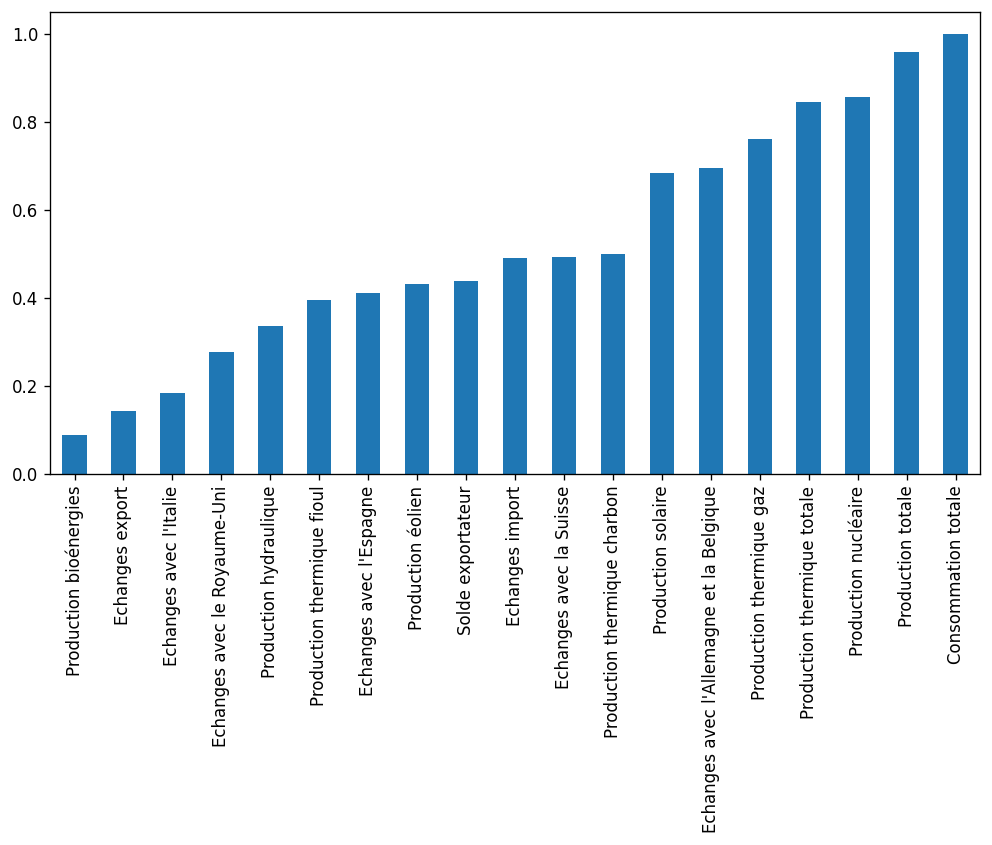

In [128]:
data1.corr()["Consommation totale"].abs().sort_values().plot(kind="bar", figsize=(10,5))

#Modele de lissage

In [129]:
#Pourquoi lisser une série temporelle ?

#Réduire l'effet du bruit dans un signal permet d'obtenir une approximation raisonnable de la série filtrée du bruit.
#La version lissée de la série peut être utilisée comme une caractéristique pour expliquer la série originale elle-même.
#Cela permet de visualiser la tendance sous-jacente de manière plus précise.

In [130]:
y=data['Consommation totale']
y

Mois
2012-01    51086
2012-02    54476
2012-03    43156
2012-04    40176
2012-05    35257
           ...  
2021-07    32959
2021-08    31184
2021-09    32350
2021-10    36762
2021-11    44458
Name: Consommation totale, Length: 119, dtype: int64

<Axes: xlabel='Mois'>

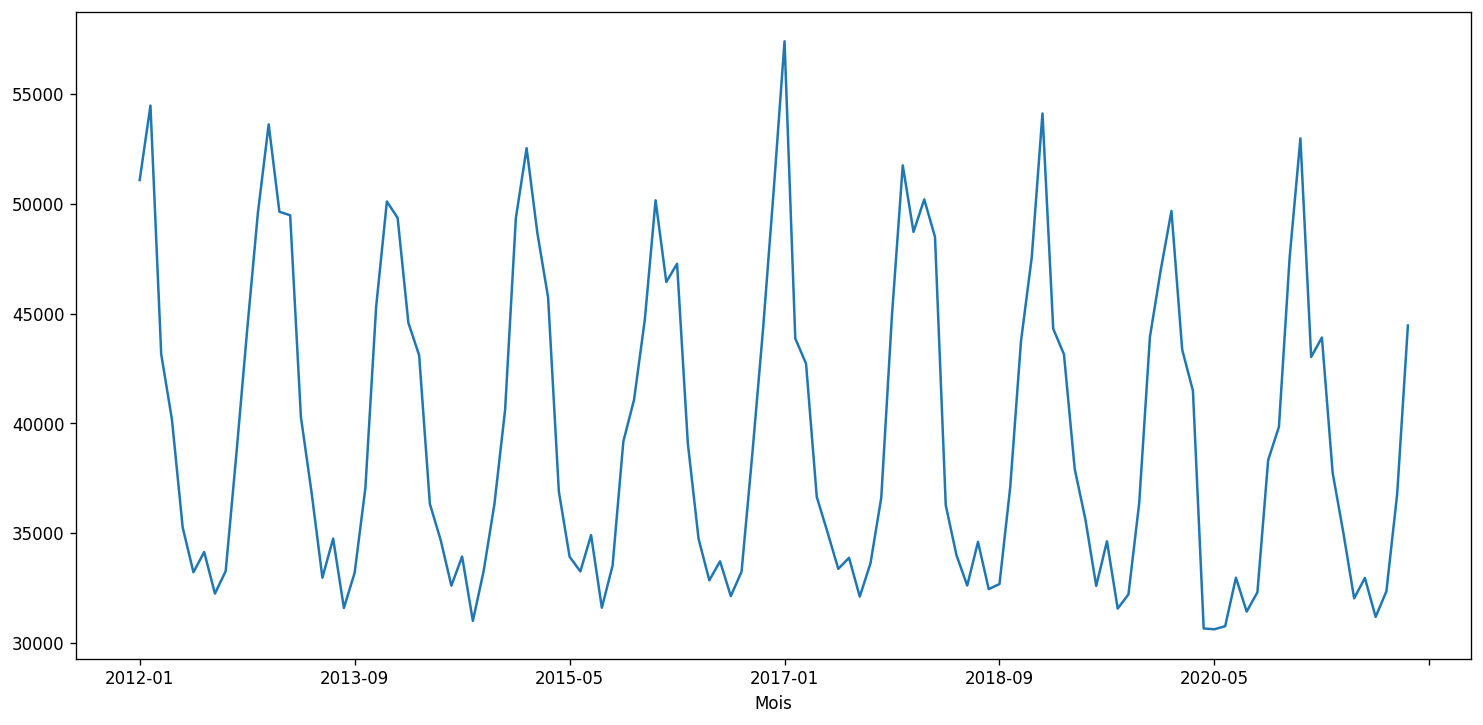

In [131]:
y.plot(figsize=(15,7))

In [132]:
# Exponential Smoothing #
from statsmodels.tsa.api import ExponentialSmoothing  #recuperer notre modele depuis python
#https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html

Exponential smoothing is a technique used in time series forecasting to make predictions based on historical data while giving more weight to recent observations. It's particularly useful when the data has a trend or seasonality.

Here's how exponential smoothing works:

1. **Initialization**: The process starts by initializing the first forecast or smoothed value. This can be done in various ways, such as using the first observation in the series or an average of the first few observations.

2. **Smoothing**: At each time step, the forecast for the next period is calculated by combining the current observed value with the previous forecasted value using a smoothing parameter (usually denoted as $\alpha$, where 0 < $\alpha$ < 1). The formula for exponential smoothing is:

   \[ F_{t+1} = $\alpha$ $\times$ Y_t + (1 - $\alpha$) $\times$ F_t \]

   where:
   - \( F_{t+1} \) is the forecast for the next period.
   - \( Y_t \) is the observed value at time \( t \).
   - \( F_t \) is the forecast for the current period.

   The smoothing parameter α determines the weight given to the current observation versus the previous forecast. A smaller α gives more weight to historical data, while a larger α gives more weight to recent data.

3. **Iteration**: The process is repeated for each time step in the series, updating the forecast at each step based on the observed values and the previous forecasts.

4. **Forecasting**: Once the smoothing process is completed, the final forecasts are obtained for future periods based on the last smoothed value and potentially adjusted for any trend or seasonality in the data.

Exponential smoothing is relatively simple to implement and computationally efficient, making it suitable for forecasting tasks where real-time updates and quick computations are required. However, it does not capture complex patterns or relationships in the data as effectively as more sophisticated methods like ARIMA or machine learning models.

In [133]:
#complifions notre modele en lui donnant d'autres informations comme la saisonnalité
y_train=y[0:100]  #le modele va s'entrainer avec 100 donnees   (souvent on prends 75-80-85%)
y_test=y[100:119] #On garde une vingtaine de donnees pour tester ou valider le modele
model = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add').fit()
y_prediction = model.forecast(19)
y_prediction

2020-05-01    31856.973610
2020-06-01    29631.496744
2020-07-01    30920.283259
2020-08-01    28107.254769
2020-09-01    29743.169885
2020-10-01    34095.487538
2020-11-01    39082.476256
2020-12-01    44617.687218
2021-01-01    47506.466730
2021-02-01    43318.439593
2021-03-01    42243.084825
2021-04-01    33936.927389
2021-05-01    30756.377468
2021-06-01    28530.900603
2021-07-01    29819.687118
2021-08-01    27006.658628
2021-09-01    28642.573744
2021-10-01    32994.891397
2021-11-01    37981.880115
Freq: MS, dtype: float64

In [134]:
print(model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:      Consommation totale   No. Observations:                  100
Model:             ExponentialSmoothing   SSE                      398741973.495
Optimized:                         True   AIC                           1551.865
Trend:                         Additive   BIC                           1593.548
Seasonal:                      Additive   AICC                          1560.310
Seasonal Periods:                    12   Date:                 Tue, 23 Apr 2024
Box-Cox:                          False   Time:                         07:57:06
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1829254                alpha                 True
smoothing_trend          

In [135]:
resultat=pd.DataFrame()
resultat["realite"]=y_test
resultat["prevision"]=y_prediction
resultat["erreur"]=(resultat["prevision"]-resultat["realite"])/resultat["realite"]*100
resultat

,realite,prevision,erreur
Mois,,,
2020-05,30622,31856.973610,4.032962
2020-06,30763,29631.496744,-3.678130
2020-07,32970,30920.283259,-6.216915
2020-08,31428,28107.254769,-10.566200
2020-09,32307,29743.169885,-7.935835
2020-10,38332,34095.487538,-11.052156
2020-11,39840,39082.476256,-1.901415
2020-12,47565,44617.687218,-6.196390
2021-01,52983,47506.466730,-10.336397


<Axes: xlabel='Mois'>

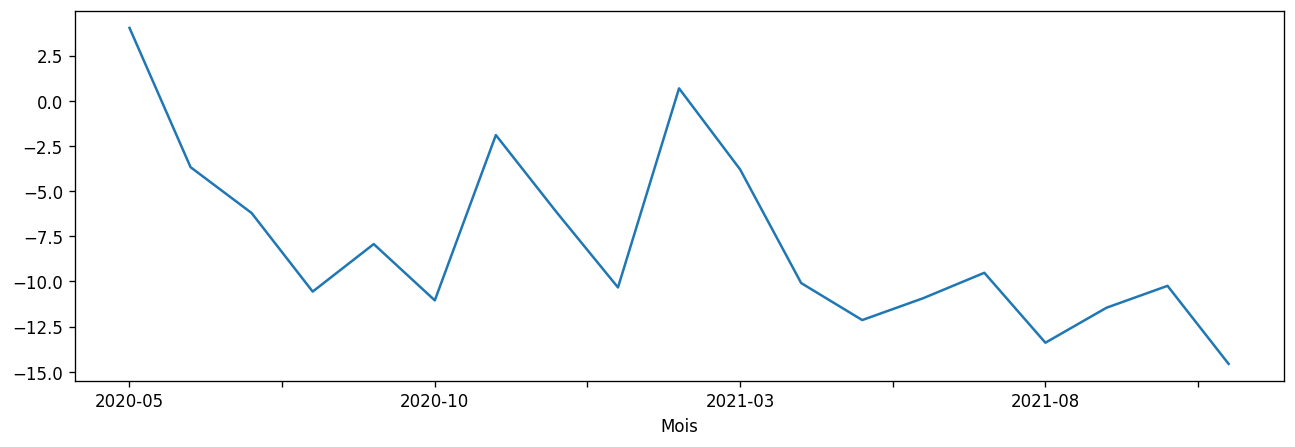

In [136]:
resultat.erreur.plot(figsize=(13,4))

In [137]:
resultat.erreur.skew()  #les erreurs sont decallées vers la droite, cela veut dire que le modele genere en generale plus d erreur quand les donnees sont importantes

0.9888899765092576

In [138]:
resultat.erreur.kurtosis()   #kurtosis>0, il semblerait que le modele genere des erreurs tres importantes (ou la probabilit"  d avoir des erreurs importantes n est pas nulle)

0.40173389132543935

In [139]:
resultat.erreur.mean()

-7.859472687878309

In [140]:
#on a une erreur generale de l'ordre de 8%, ce qui est beaucoup!!!! on se fixe comme objectif d'avoir un modele avec une precision de 95%. Essayons avec un modele ARIMA plus utilisé et plus robust

#ARIMA model

modele=API arima

modele.fit(data) : une methode pour entrainer le modele

modele.predict(new_data) : une prediction

modele.score() : la precision du modele

valider le modele en prenant en compte les objectifs de depart

#Quel type de données faut-il utiliser pour les modèles ARIMA ?
Les modèles ARIMA sont généralement utilisés pour modéliser des données de séries temporelles. Les données de séries temporelles sont des données qui consistent en de nombreuses mesures répétées prises sur la même quantité. Ces mesures sont généralement prises à plusieurs reprises sur une longue période. Un exemple de données de séries temporelles est les données sur le nombre d'unités d'un produit donné vendues chaque jour.

Une chose importante à savoir sur les modèles de séries temporelles comme les modèles ARIMA est qu'ils peuvent être entraînés sans aucune donnée sur les caractéristiques associées à la variable de résultat. Plutôt que de se fier aux valeurs des caractéristiques pour prédire la valeur de la variable de résultat, les modèles de séries temporelles utilisent les mesures précédentes de la variable de résultat pour prédire les valeurs futures de la variable de résultat. Certains modèles de séries temporelles peuvent prendre en compte des informations sur les caractéristiques, mais ce n'est généralement pas nécessaire.

#Les types de modèles ARIMA
1. **ARIMA :** Il s'agit de la formulation de base d'un modèle ARIMA qui n'a pas de fonctionnalités supplémentaires. Ce modèle simple ne peut pas prendre en compte des éléments tels que la saisonnalité ou les caractéristiques associées à la variable de résultat.
2. **SARIMA :** Les modèles ARIMA de base n'incluent pas de composante saisonnière, ils ne sont donc pas idéaux pour représenter des données qui contiennent des tendances saisonnières. Un modèle SARIMA est une extension d'un modèle ARIMA de base conçu pour gérer les données avec des tendances saisonnières. Les modèles SARIMA sont parfois appelés modèles ARIMA saisonniers.
3. **ARIMAX :** Les modèles ARIMA de base ne vous permettent pas d'incorporer des informations sur les caractéristiques associées à la variable de résultat. Un modèle ARIMAX est une extension d'un modèle ARIMA de base conçue pour inclure des covariables ou des caractéristiques qui peuvent être utilisées pour aider à prédire la variable de résultat.
4. **SARIMAX :** Un modèle SARIMAX est une combinaison d'un modèle SARIMA et d'un modèle ARIMAX. Cela signifie que ce modèle peut être utilisé pour modéliser des données de séries temporelles ayant à la fois des composantes saisonnières et des caractéristiques associées à la variable de résultat.

#Les avantages des modèles ARIMA :

1. **Bien compris** : Les modèles ARIMA sont assez bien étudiés et compris. Tout le reste étant égal, il est bénéfique d'utiliser des modèles bien étudiés. Lorsque vous utilisez des modèles courants et bien étudiés, il est plus facile pour les membres de l'équipe de fournir des conseils et d'aider à résoudre les problèmes. Les parties prenantes moins techniques ont tendance à faire davantage confiance aux modèles courants qu'elles ont entendu parler plutôt qu'aux modèles complexes qu'elles ne connaissent pas.

2. **Relativement explicables** : En plus d'être bien compris, les modèles ARIMA sont également relativement explicables. C'est un grand avantage si vous travaillez avec des parties prenantes qui ne font pas confiance aux modèles complexes qu'elles ne comprennent pas. Plus un modèle est explicable, plus il est facile de convaincre une partie prenante sceptique d'accepter les résultats de ce modèle.

3. **Spécification flexible du modèle** : Un autre avantage des modèles de la famille ARIMA est qu'ils sont très flexibles. Cela signifie qu'ils peuvent être adaptés pour modéliser de nombreux types différents de séries temporelles. C'est utile si vous voulez mettre en place un processus qui modélise de nombreuses séries temporelles différentes à l'aide d'un seul type de modèle.

4. **Adapté aux petits ensembles de données** : Un avantage que les modèles ARIMA ont sur les réseaux neuronaux et les modèles d'apprentissage profond qui sont entraînés sur des données de séries temporelles est qu'ils peuvent être entraînés sur des ensembles de données relativement petits. Cela est dû au fait qu'il y a moins de paramètres à spécifier pour définir le modèle.

5. **Performances fiables** : Enfin, les modèles ARIMA ont tendance à avoir des performances solides qui sont comparables à d'autres techniques statistiques courantes pour les séries temporelles. Même s'ils ne sont pas les meilleurs modèles absolus, vous pouvez généralement vous attendre à des performances décentes de leur part. Cela signifie qu'ils sont une bonne option pour les situations où vous n'avez pas beaucoup de temps pour expérimenter et jouer avec différents modèles de séries temporelles.

6. **Peuvent gérer les données manquantes** : Un autre avantage des modèles ARIMA est qu'ils peuvent généralement gérer les données comportant des valeurs manquantes. C'est important si vous utilisez des données qui ont parfois des valeurs manquantes, comme des données provenant d'un capteur qui se casse occasionnellement ou ne prend pas une mesure correcte.

#Les inconvénients des modèles ARIMA

1. **Incapacité à gérer plusieurs saisonnalités de manière native** : Les modèles ARIMA ont généralement du mal à gérer nativement les situations où il y a plusieurs saisons. Par exemple, si vos données présentent à la fois des tendances quotidiennes et annuelles, il peut être difficile de les modéliser avec des modèles ARIMA de base. Il existe des moyens d'adapter les modèles ARIMA à ces situations, mais ils ne sont pas gérés nativement dans la plupart des bibliothèques de séries temporelles.

2. **Difficulté à gérer les changements de moyenne** : Les modèles de séries temporelles peuvent être perturbés par des changements soudains qui modifient le niveau des données. Ils ne sont pas idéaux pour gérer les situations où il y a eu une augmentation ou une diminution soudaine de la valeur moyenne de la variable de résultat. Cela peut rendre difficile la modélisation des séries temporelles perturbées par des événements.

3. **Conçus uniquement pour les séries temporelles univariées** : Les modèles ARIMA sont généralement conçus pour modéliser des séries temporelles univariées indépendantes les unes des autres. Cela signifie qu'ils ne sont peut-être pas idéaux pour gérer des situations complexes où vous avez plusieurs séries temporelles interconnectées que vous souhaitez modéliser simultanément.

4. **Incapacité à modéliser les dépendances non linéaires au fil du temps** : Les modèles ARIMA ne sont pas conçus pour les situations où il existe des dépendances non linéaires entre la valeur actuelle de la variable de résultat et les valeurs précédentes de la variable de résultat. Par exemple, si les dépendances entre la valeur actuelle d'une variable et une valeur précédente de la variable sont quadratiques, un modèle ARIMA ne pourra pas bien modéliser ces dépendances.

5. **Sensibilité aux valeurs aberrantes** : Les modèles ARIMA sont quelque peu sensibles aux valeurs aberrantes et extrêmes. Si vous avez un ensemble de données qui contient beaucoup de valeurs aberrantes, vous devrez peut-être prétraiter vos données avant d'entraîner un modèle ARIMA.

6. **La spécification des paramètres est plus un art qu'une science** : Les modèles ARIMA ont plusieurs paramètres qui doivent être spécifiés. La spécification de ces paramètres relève davantage de l'art que de la science, ce qui signifie que la qualité du modèle produit dépend beaucoup plus de l'habileté et de l'expérience de la personne qui construit le modèle.

7. **Peut avoir une complexité temporelle élevée** : Les modèles ARIMA peuvent être lents et nécessiter beaucoup de ressources computationnelles à entraîner en fonction de l'ensemble de paramètres utilisé. Cet inconvénient peut être réduit en limitant la gamme des valeurs de paramètres considérées, mais cela peut signifier sacrifier une certaine puissance prédictive.

8. **Nécessite que les données soient rendues stationnaires par différenciation** : Enfin, les modèles ARIMA reposent sur l'hypothèse que les données qui sont modélisées sont stationnaires ou peuvent être rendues stationnaires par différenciation. Si cette hypothèse n'est pas respectée, les performances des modèles en souffriront.

In [141]:
y.diff(1)   #on derive une fois et on a y'(t)= y(t)-y(t-1)
y.diff(2)   #on derive deux fois et on a y''(t)=y(t)-2y(t-1)+y(t-2)

Mois
2012-01        NaN
2012-02        NaN
2012-03    -7930.0
2012-04   -14300.0
2012-05    -7899.0
            ...   
2021-07    -2048.0
2021-08     -848.0
2021-09     -609.0
2021-10     5578.0
2021-11    12108.0
Name: Consommation totale, Length: 119, dtype: float64

le differecing sert a rendre la serie stationnaire

In [142]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order=(p,q,d),
p=nombre de mois du passé pris en compte pour le modele
q=nombre de residus du passé prises en compte pour le modele
d=le nombre de fois qu'on devrait deriver la serie pour la rendre stationnaire

seasonal_order = (P,Q,D, FREQUENCE)
P=nombre de mois du passé pris en compte pour le modele avec les donnees saisonnieres
Q=nombre de residus du passé prises en compte pour le modele avec les donnees saisonnieres
D=le nombre de fois qu'on devrait deriver la serie pour la rendre stationnaire avec les donnees saisonnieres

In [143]:
model = SARIMAX(y_train, order=(1,1,1), seasonal_order = (1,1,1, 12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                Consommation totale   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -827.309
Date:                            Tue, 23 Apr 2024   AIC                           1664.618
Time:                                    07:57:08   BIC                           1676.948
Sample:                                01-01-2012   HQIC                          1669.583
                                     - 04-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4636      0.282      1.643      0.100      -0.089       1.017
ma.L1         -0.5878      0.283   

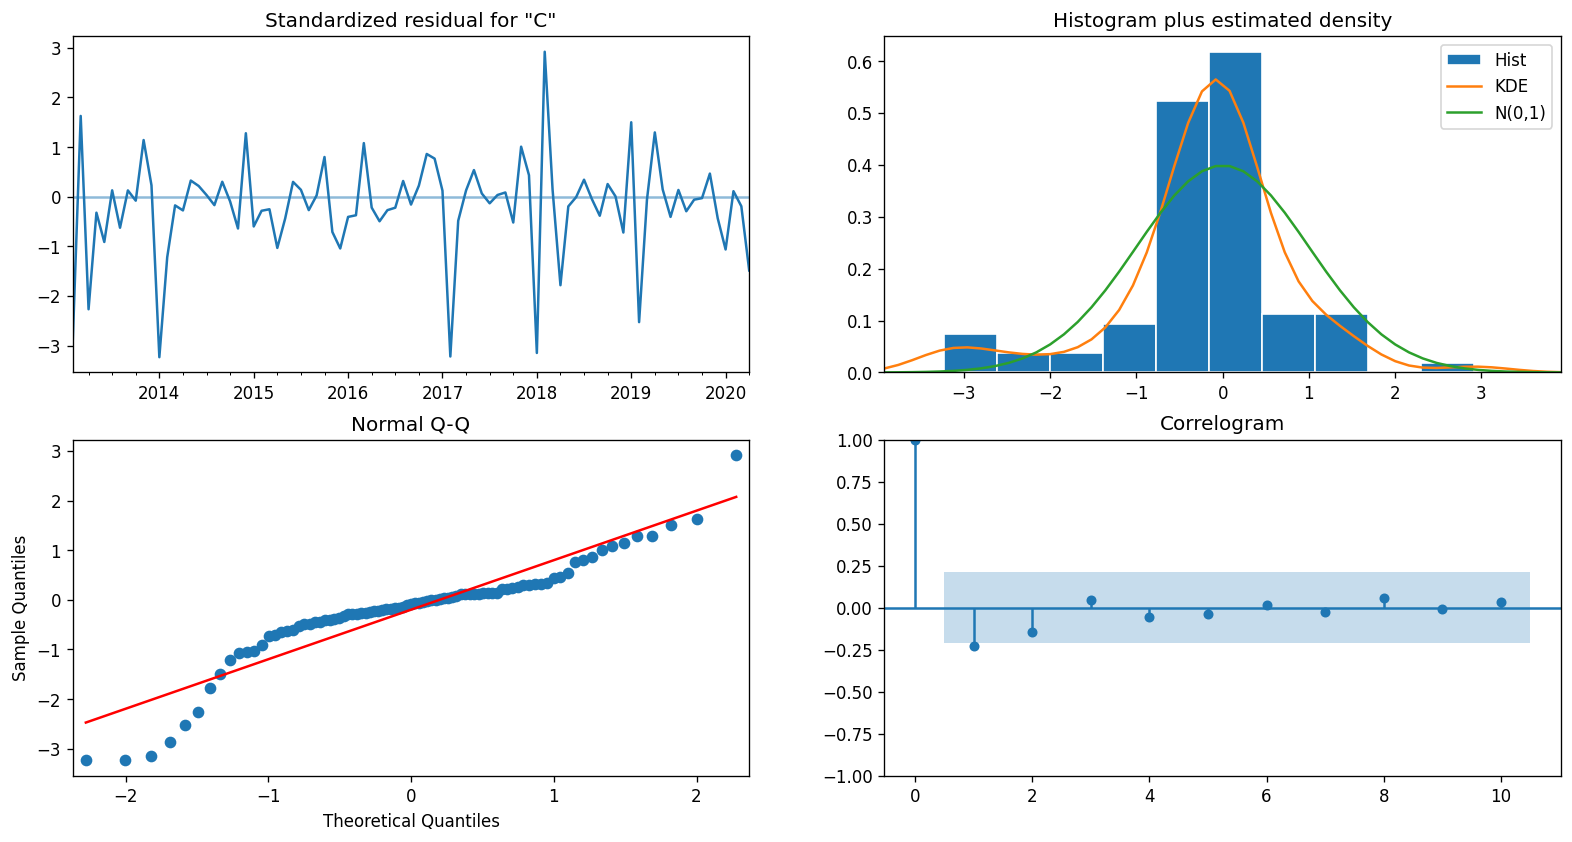

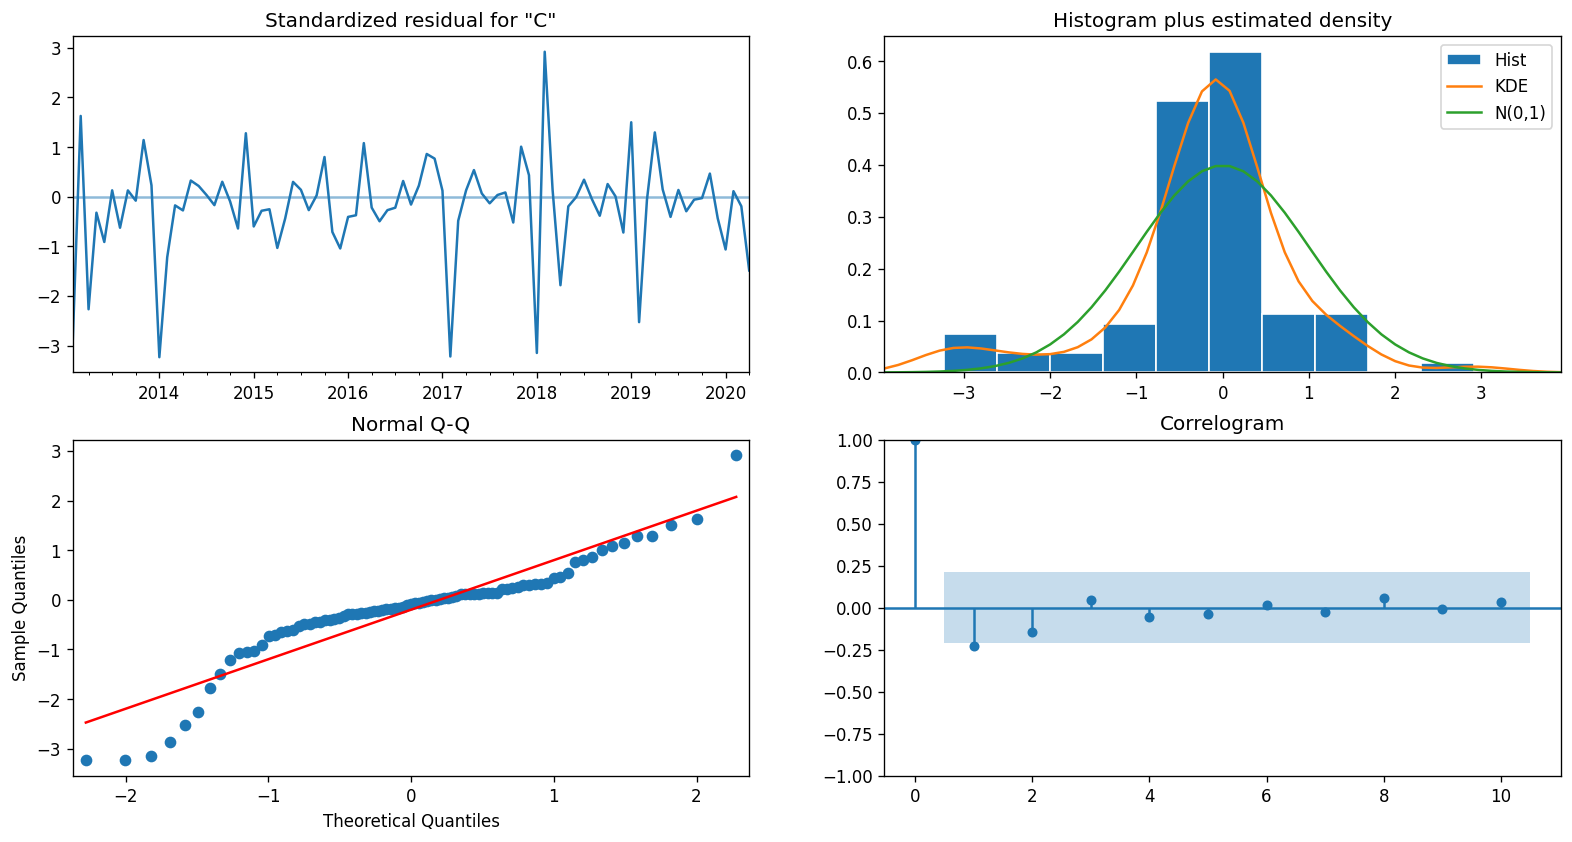

In [144]:
results.plot_diagnostics(figsize=(16,8))

In [145]:
erreur=results.resid[1:]   #les residus ou erreurs du modele directement fournies par l'API/+
erreur

Mois
2012-02    8349.332331
2012-03   -8102.076881
2012-04   -2402.733717
2012-05   -4929.239213
2012-06   -2614.500357
              ...     
2019-12   -1385.117441
2020-01   -3361.944011
2020-02     347.250186
2020-03    -611.832388
2020-04   -4696.986965
Length: 99, dtype: float64

<Axes: xlabel='Mois'>

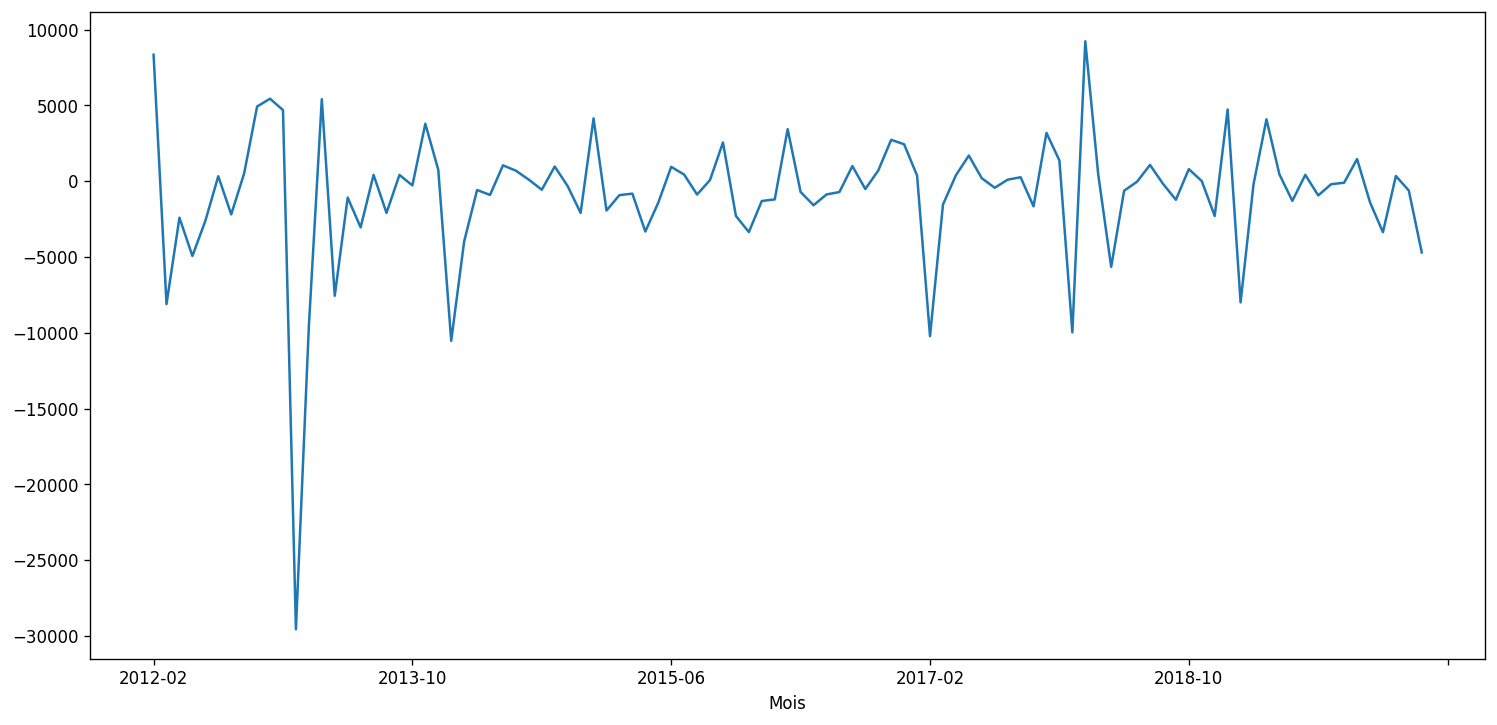

In [146]:
erreur.plot(figsize=(15,7))

In [147]:
erreur.mean()

-823.2699736899202

In [148]:
y.mean()

39613.79831932773

In [149]:
erreur.mean()/y.mean()*100

-2.078240432925725

In [150]:
#En moyenne on a des erreurs de l'ordre de 2.07% (par contre, il faut appronfondir cet analyse)

La première étape pour construire un modèle ARIMA est de rendre la série temporelle stationnaire.

Pourquoi ?

Parce que le terme "Auto Regressive" dans ARIMA signifie qu'il s'agit d'un modèle de régression linéaire qui utilise ses propres retards comme prédicteurs. Les modèles de régression linéaire, comme vous le savez, fonctionnent mieux lorsque les prédicteurs ne sont pas corrélés et sont indépendants les uns des autres.

Alors, comment rendre une série stationnaire ?

L'approche la plus courante est de la différencier. C'est-à-dire, soustraire la valeur précédente de la valeur actuelle. Parfois, en fonction de la complexité de la série, il peut être nécessaire d'effectuer plus d'une différenciation.

La valeur de d est donc le nombre minimum de différenciations nécessaires pour rendre la série stationnaire. Et si la série temporelle est déjà stationnaire, alors d = 0.

Ensuite, quels sont les termes 'p' et 'q' ?

'p' est l'ordre du terme 'Auto Regressive' (AR). Il fait référence au nombre de retards de Y à utiliser comme prédicteurs. Et 'q' est l'ordre du terme 'Moving Average' (MA). Il fait référence au nombre d'erreurs de prévision décalées qui doivent être incluses dans le modèle ARIMA.

Alors, quels sont les modèles AR et MA ? Quelle est la formule mathématique réelle pour les modèles AR et MA ?

Un modèle purement autorégressif (AR uniquement) est celui où Yt dépend uniquement de ses propres retards. Autrement dit, Yt est une fonction des "lags de Yt" :

$Y_t =\alpha+ϕ_1Y_{t−1}+ϕ_2Y_{t−2}+…+ϕ_pY_{t−p}+\epsilon_t$

Où $Y_{t-1}$ est le retard 1 de la série, beta1 est le coefficient du retard 1 estimé par le modèle et alpha est le terme d'interception, également estimé par le modèle.

De même, un modèle purement de moyenne mobile (MA uniquement) est celui où Yt dépend uniquement des erreurs de prévision décalées :

$Y_t =\alpha + \epsilon_t+ ϕ_1\epsilon_{t-1}+ϕ_2\epsilon_{t-2}+…+ϕ_q\epsilon_{t-q}$

où les termes d'erreur sont les erreurs des modèles autorégressifs des retards respectifs. Les erreurs $\epsilon_1$ et $\epsilon_{t-1}$ sont les erreurs provenant des équations suivantes :

$$
Y_t =\beta_1Y_{t−1}+\beta_2Y_{t−2}+…+\beta_0Y_0+\epsilon_t \\
Y_{t-1} =\beta_1Y_{t−2}+\beta_2Y_{t−3}+…+\beta_0Y_0+\epsilon_{t-1}
$$

C'était respectivement pour les modèles AR et MA.

Alors, à quoi ressemble l'équation d'un modèle ARIMA ?

Un modèle ARIMA est un modèle où la série temporelle a été différenciée au moins une fois pour la rendre stationnaire, et où l'on combine les termes AR et MA. Ainsi, l'équation devient :
$$
Y_t =\alpha +\beta_1Y_{t−1}+\beta_2Y_{t−2}+…+\beta_pY_{t-p}\epsilon_{t} +  ϕ_1\epsilon_{t-1}+ϕ_2\epsilon_{t-2}+…+ϕ_q\epsilon_{t-q}
$$

ARIMA model in words :

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags).

#Comment trouver l'odre de differencing (d) dans le modèle ARIMA ?

L'objectif de la différenciation est de rendre la série temporelle stationnaire.

Cependant, il faut faire attention à ne pas surdifférencier la série. En effet, une série surdifférenciée peut encore être stationnaire, ce qui aura des répercussions sur les paramètres du modèle.

Alors, comment déterminer le bon ordre de différenciation ?

Le bon ordre de différenciation est le minimum nécessaire pour obtenir une série presque stationnaire qui oscille autour d'une moyenne définie et dont le graphique ACF atteint rapidement zéro.

Si les autocorrélations sont positives pour de nombreux lags (10 ou plus), alors la série nécessite une différenciation supplémentaire. En revanche, si l'autocorrélation au lag 1 est elle-même trop négative, alors la série est probablement surdifférenciée.

Dans le cas où vous ne pouvez vraiment pas décider entre deux ordres de différenciation, choisissez celui qui donne l'écart-type le plus faible dans la série différenciée.

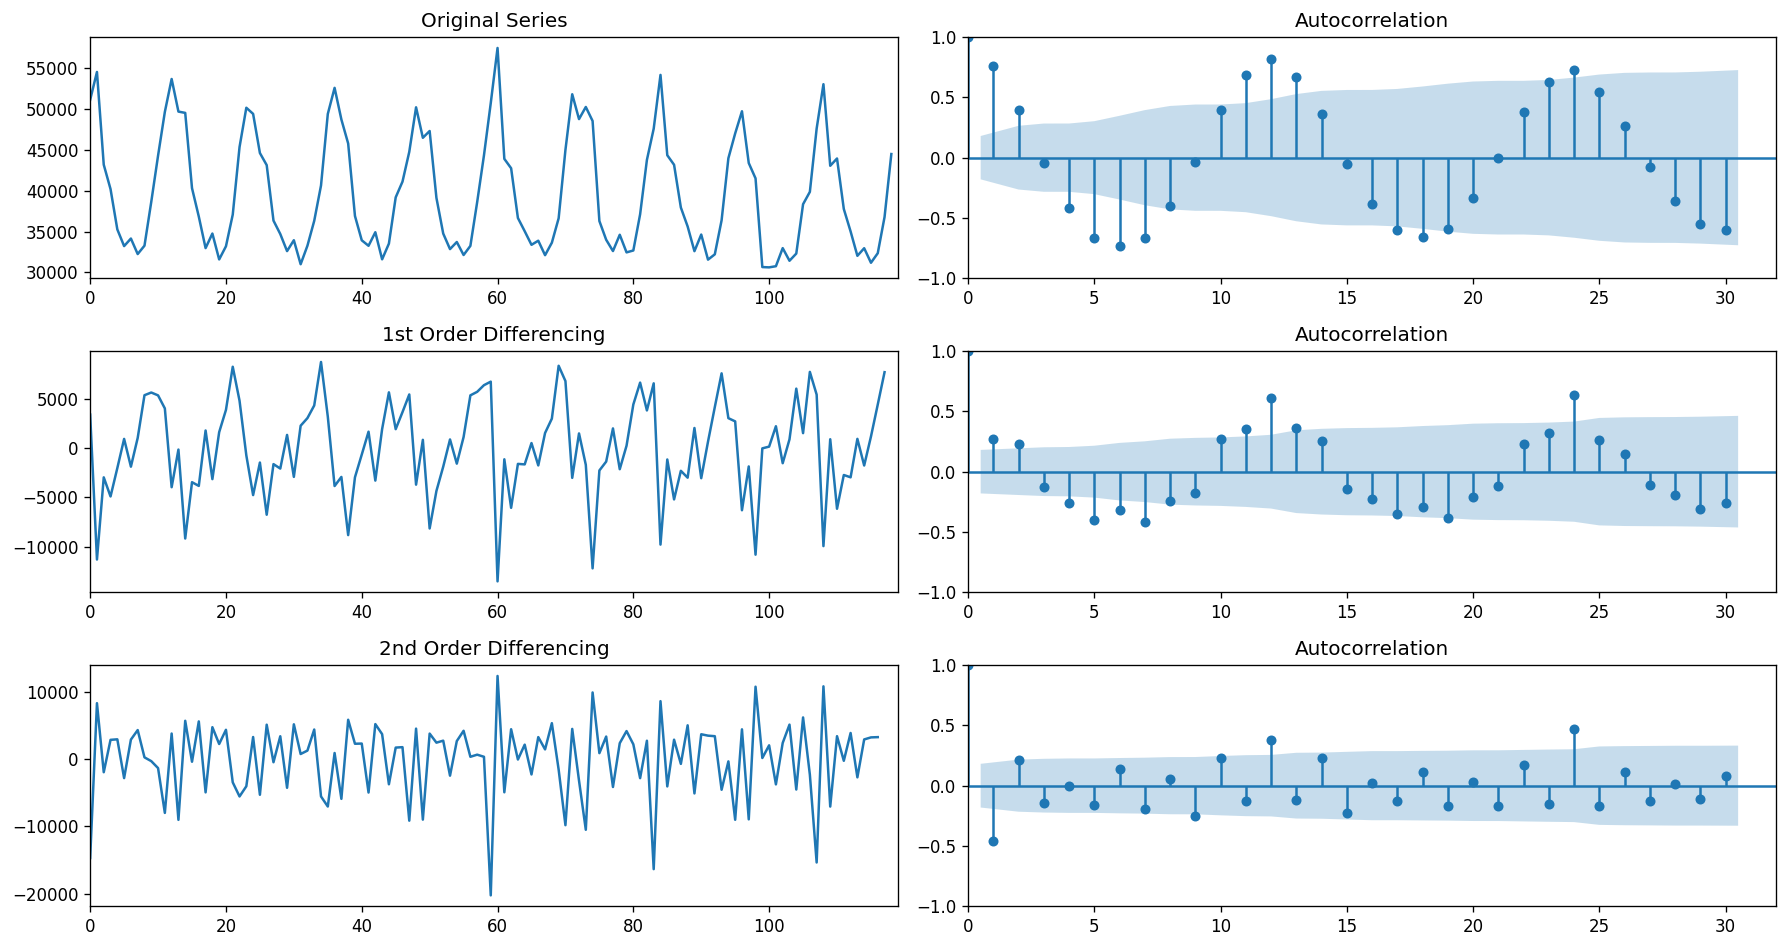

In [151]:
from numpy import sqrt, mean, log, diff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

y = data['Consommation totale'].values

# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
fig.set_figwidth(15)
fig.set_figheight(8)

axes[0, 0].plot(y)
axes[0, 0].set_title('Original Series')
plot_acf(y, lags=30, ax=axes[0, 1])

# 1st Differencing
diff_y = np.diff(y)
axes[1, 0].plot(diff_y)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(diff_y, lags=30, ax=axes[1, 1])

# 2nd Differencing
diff_diff_y = np.diff(diff_y)
axes[2, 0].plot(diff_diff_y)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(diff_diff_y, lags=30, ax=axes[2, 1])

# Set x-axis limits
axes[0, 0].set_xlim(0, y.shape[0])
axes[1, 0].set_xlim(0, y.shape[0])
axes[2, 0].set_xlim(0, y.shape[0])

axes[0, 1].set_xlim(0, 32)
axes[1, 1].set_xlim(0, 32)
axes[2, 1].set_xlim(0, 32)

plt.tight_layout()
plt.show()

In [152]:
data['Consommation totale'].diff().describe()

count      118.000000
mean       -56.169492
std       4752.879941
min     -13537.000000
25%      -2962.500000
50%        367.500000
75%       3339.000000
max       8733.000000
Name: Consommation totale, dtype: float64

In [153]:
data['Consommation totale'].diff().diff().describe()

count      117.000000
mean        36.803419
std       5698.142366
min     -20273.000000
25%      -3734.000000
50%       1727.000000
75%       3731.000000
max      12391.000000
Name: Consommation totale, dtype: float64

In [154]:
#Alors c'est mieux de choisir d = 1 puisque l'écart-type est plus petit.

#Comment trouver l'ordre de AR (p) ?

La prochaine étape consiste à déterminer si le modèle a besoin de termes AR. Vous pouvez découvrir le nombre nécessaire de termes AR en examinant le graphique de corrélation partielle (PACF, Partial Autocorrelation Function).

La corrélation partielle peut être imaginée comme la corrélation entre la série et son lag, après avoir exclu les contributions des lags intermédiaires. Ainsi, la PACF transmet en quelque sorte la corrélation pure entre un lag et la série. De cette manière, vous saurez si ce lag est nécessaire dans le terme AR ou non.

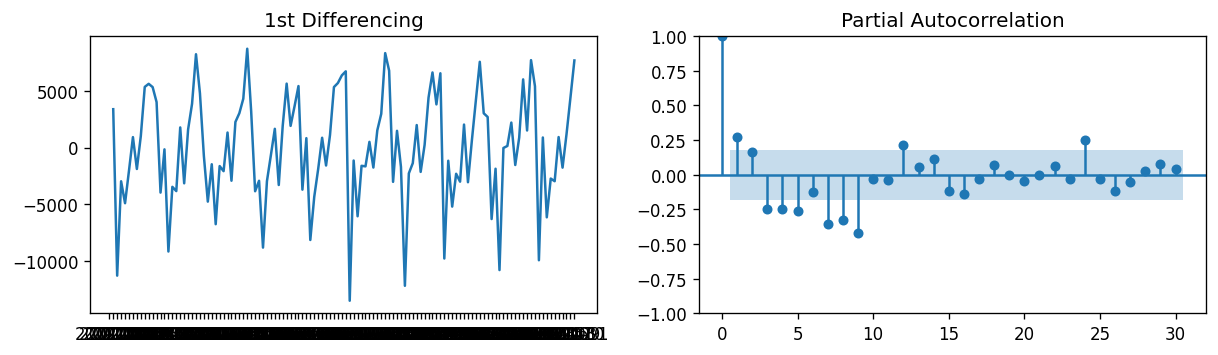

In [155]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(data['Consommation totale'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data['Consommation totale'].diff().dropna(), lags=30, ax=axes[1])

plt.show()

In [156]:
#On voit que le lag = 1 est significant puisque c'est au dessus de significance level alors on peut choisir p = 1.

#Comment trouver l'order de MA (q) ?

Tout comme nous avons examiné le graphique de corrélation partielle (PACF) pour déterminer le nombre de termes AR, vous pouvez examiner le graphique de corrélation (ACF) pour le nombre de termes MA. Un terme MA est techniquement l'erreur de la prévision décalée.

Le ACF indique combien de termes MA sont nécessaires pour éliminer toute autocorrélation dans la série rendue stationnaire.

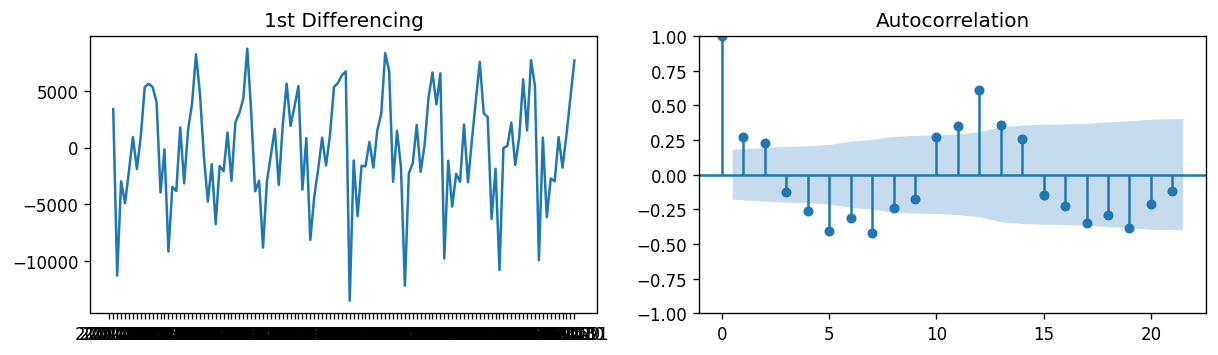

In [157]:
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(data['Consommation totale'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(data['Consommation totale'].diff().dropna(), ax=axes[1])

plt.show()

In [158]:
#les lags 1 et 2 sont au dessus de significance level, alors on peut choisir q = 1 ou q = 2.

In [159]:
model = SARIMAX(y_train, order=(1,2,1), seasonal_order = (1,2,1, 12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                Consommation totale   No. Observations:                  100
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 12)   Log Likelihood                -718.397
Date:                            Tue, 23 Apr 2024   AIC                           1446.794
Time:                                    07:57:29   BIC                           1458.314
Sample:                                01-01-2012   HQIC                          1451.390
                                     - 04-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0268      0.147     -0.182      0.856      -0.316       0.262
ma.L1         -0.9257      0.087   

In [160]:
erreur=results.resid[1:]

<Axes: xlabel='Mois'>

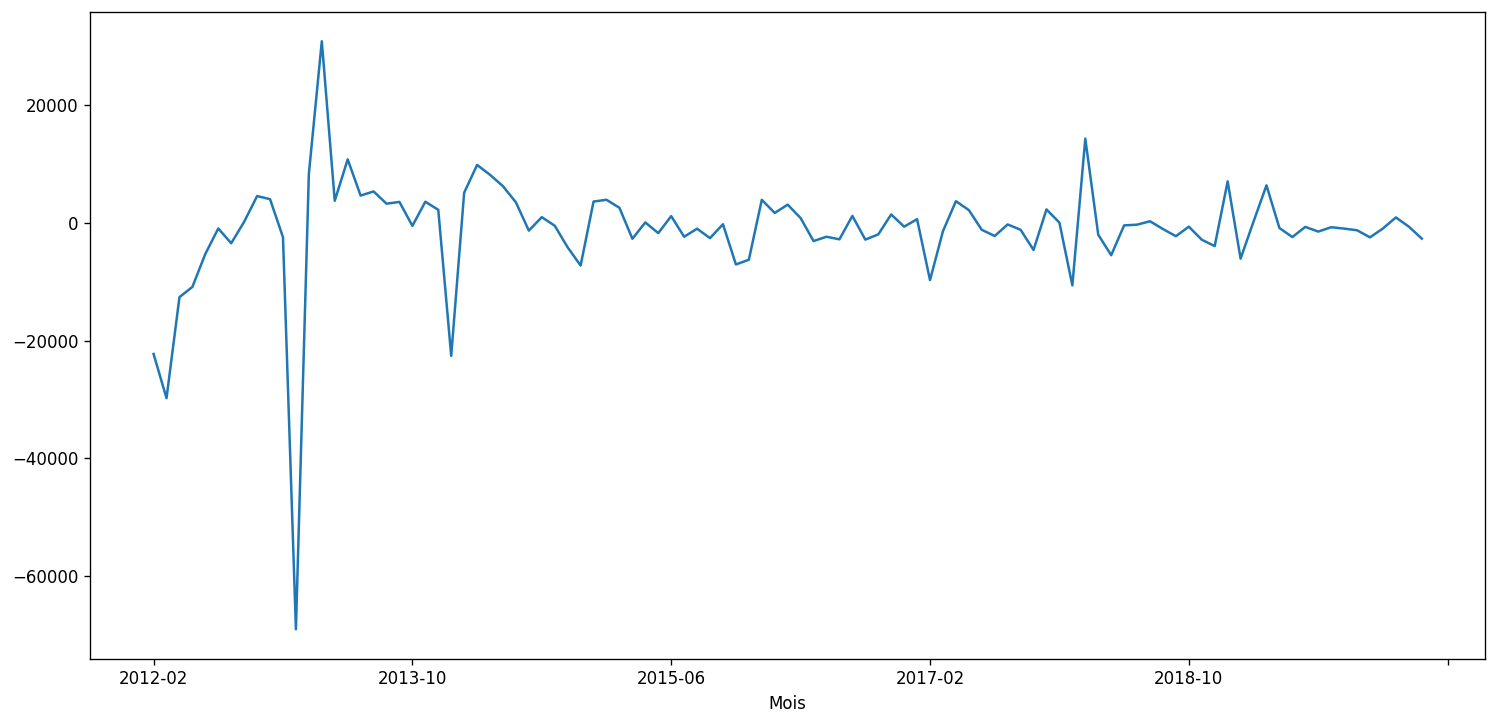

In [161]:
erreur.plot(figsize=(15,7))

In [162]:
erreur.mean()

-1221.7709966628763

In [163]:
model = SARIMAX(y_train, order=(1,1,2), seasonal_order = (1,1,2, 12))
results1 = model.fit()
print(results1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                Consommation totale   No. Observations:                  100
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -818.593
Date:                            Tue, 23 Apr 2024   AIC                           1651.187
Time:                                    07:57:34   BIC                           1668.448
Sample:                                01-01-2012   HQIC                          1658.137
                                     - 04-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5483      0.240     -2.280      0.023      -1.020      -0.077
ma.L1          0.5370      0.283   

In [164]:
erreur1=results1.resid[1:]
erreur1

Mois
2012-02    6037.790178
2012-03   -1380.087062
2012-04   -7065.797868
2012-05   -3353.186302
2012-06   -4658.562656
              ...     
2019-12   -2457.654935
2020-01   -2357.544361
2020-02     986.864602
2020-03    -503.124683
2020-04   -4525.303213
Length: 99, dtype: float64

<Axes: xlabel='Mois'>

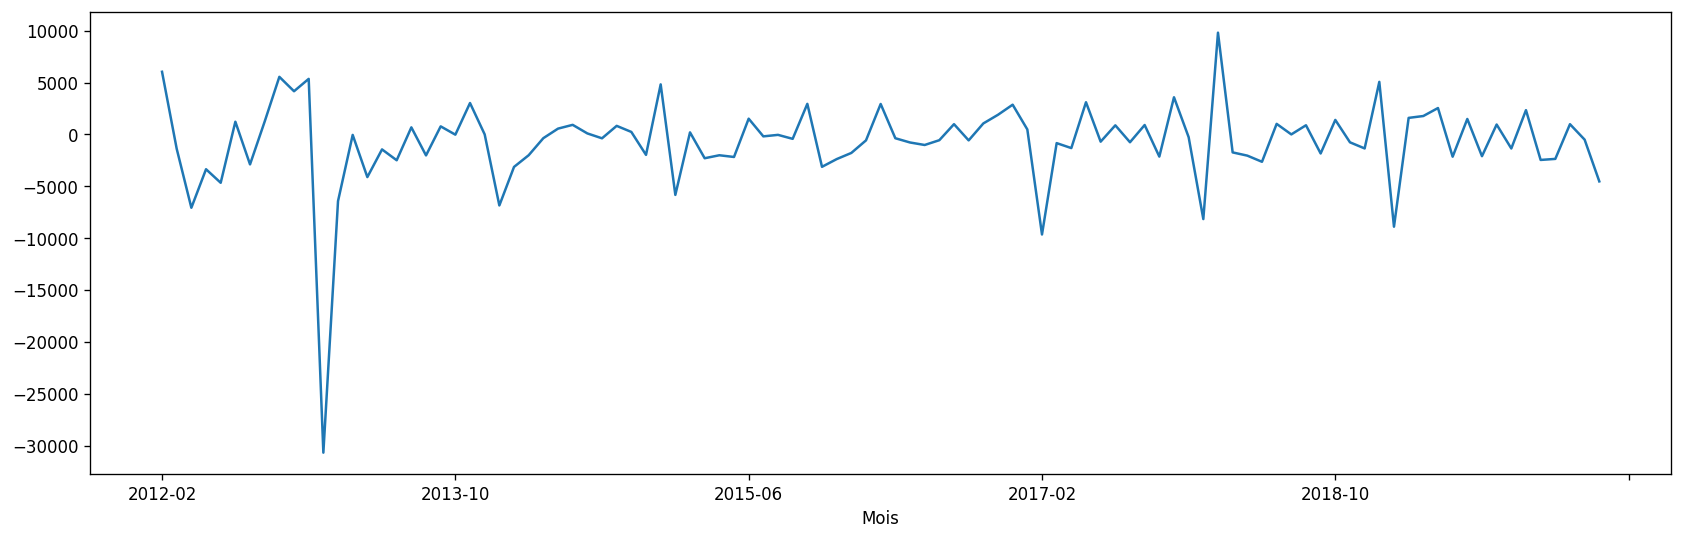

In [165]:
erreur1.plot(figsize=(17,5))

In [166]:
erreur1.mean()

-758.0312396700195